<a href="https://colab.research.google.com/github/jaquelinesindie/ProjetoM4/blob/main/M%C3%B3dulo_4_Dados_para_abastecer_o_carro!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Dados para abastecer o carro!**

---

Fomos escalados pela Agência Nacional de Petróleo e Gás Natural e Bio-combustíveis (ANP) para realizar uma análise exploratória relacionada à série
histórica de preço de venda da gasolina e do etanol.
Serão utilizados os arquivos dos dois últimos meses do ano atual contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil que estão disponíveis no
portal dados.gov.

### **1. Coletando os dados:**

Nesta etapa coletamos e realizando uma análise inicial para melhor comprensão dos dados de forma geral.

Os dados foram retirados do Portal Brasileiro de Dados Abertos do Governo Federal: [dados.gov.br](https://dados.gov.br/).


O link direito aos dados você encontra abaixo:

- [Dodos Julho 2022](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv)
- [Dados Agosto 2022](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv )

Caso queria visualizar os dados de outros períodos, você pode encontrar no link abaixo:

- [Dados Gerais](https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda)


#### **1.1 Importando as bibliotecas para realização da analise:**

Nesta etapa iremos importar as bibliotecas necessárias para iniciar o tratamento e a análise dos dados:

In [ ]:
# Carregando os pacotes do Python necessários à execução do projeto:
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#### **1.2 Descrevendo os dados:**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis, além de aspectos gerais úteis para o entendimento geral.

In [ ]:
# Carregando os datasets com informações necessárias:
dados_julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-07.csv', sep = ';')

dados_agosto = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2022/precos-gasolina-etanol-08.csv', sep = ';')

In [ ]:
# Unificando os dataframes (dados_julho e dados_agosto):
df = pd.concat([dados_julho, dados_agosto])

**Dicionário das variáveis:**

* `Regiao - Sigla` - sigla da região: sudeste - SE, centro-oeste - CO, nordeste - NE, sul - S e norte - N
* `Estado - Sigla ` - sigla do estado (SP, RJ, AC, etc)
* `Municipio` - nome do município.
* `Revenda` - empresa responsável pela revenda o combustível.
* `CNPJ da Revenda` - cnpj de empresa resposável pela revenda o combustível.
* `Nome da Rua` - nome da rua da revenda.
* `Numero Rua` - número da rua da revenda.
* `Complemento` -  informação que usamos para indicar com exatidão a localização de um imóvel.
* `Bairro` - bairro da revenda.
* `Cep` - CEP (Código de Endereçamento Postal) da revenda.
* `Produto` - produto (Etanol, Gasolina ou Gasolita Aditivada) revendido.
* `Data da Coleta` - data de coleda das informações.
* `Valor de Venda` - valor de venda do produto.
* `Valor de Compra` - valor de compra do produto.
* `Unidade de Medida` - unidade de medida de venda do produto.
* `Bandeira` - distribuidora do produto.

In [ ]:
# Conhecendo o formato do dataframe:
df.shape

(127176, 16)

Verificamos aqui que temos um total de **127176 linhas** e **16 colunas** presente no dataframe a ser analisado.



In [ ]:
# Conhecendo as varíaveis e seus tipos:
df.dtypes

Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

Aqui verificamos os tipos das variáveis que integram nosso dataframe: **float** (float64) e **objetos** (object). 

Esta verificação poderá indicar na fase de preparação dos dados **a necessidade de transformação nessa variáveis.** 

In [ ]:
# Visualizando as 5 primeiras linhas do dataframe:
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA


In [ ]:
# Vizualizando as 5 últimas linhas do dataframe:
df.tail()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
69539,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,ETANOL,31/08/2022,"3,99",NaN,R$ / litro,IPIRANGA
69540,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69541,CO,DF,BRASILIA,POSTO TOP TAGUATINGA COMERCIO DE COMBUSTIVEIS ...,37.189.518/0001-25,QUADRA QI 23 LOTES 40/41,42,POSTO DE GASOLINA 01,SETOR INDUSTRIAL (TAGUATINGA),72135-230,GASOLINA ADITIVADA,31/08/2022,"5,19",NaN,R$ / litro,IPIRANGA
69542,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,GASOLINA,31/08/2022,"5,27",NaN,R$ / litro,BRANCA
69543,SE,MG,JANAUBA,AUTO POSTO COMBUSTIVEIS VERAS SANTANA LTDA,33.063.482/0001-88,AVENIDA DA SAUDADE,656,NaN,SANTO ANTONIO,39447-190,ETANOL,31/08/2022,"3,67",NaN,R$ / litro,BRANCA


### **2. Limpeza do dados:**

Nesta etapa buscamos identificar e tratar possíveis informações nulas (NaN), duplicadas e outliers para uma melhor análise dos dados.

##### **2.1 Tratando possíveis valores nulos (NaN):**

In [ ]:
# Cálculo do percentual de dados faltantes no dataframe:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.787075
Bairro               0.003240
Numero Rua           0.000558
Regiao - Sigla       0.000000
Estado - Sigla       0.000000
Municipio            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

Analisando o percentual de itens nulos (NaN) por coluna, verificamos que a coluna `` Valor de Compra `` tem 100% das suas informações nulas, ou seja, **tem todas as suas 127176 linhas preenchidas com  valores anulados.** Dessa forma, essa coluna se torna dispensável para as análises a serem realizadas e será removida.

Em seguida temos a coluna `` Complemento `` **com 78% das informações anuladas**, sendo essa uma informação ligada a localização da revendedora analisada. Como estamos realizando uma análise a nivel nacional e temos presente as colunas `` Regiao - Sigla `` e `` Estado - Sigla `` com 100% das informações presentes, a coluna `` Complemento `` também se torna dispensável para as análises a serem realizadas e será removida.



In [ ]:
# Removendo a coluna 'Valor de Compra' e 'Complemento':
df.drop('Valor de Compra', axis = 1, inplace=True)
df.drop('Complemento', axis = 1, inplace=True)

##### **2.2 Tratando possíveis valores duplicados:**

In [ ]:
# Verificando se temos linhas com informações duplicadas:
df[df.duplicated() == True]

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira


Verificamos que **não há informações duplicadas no dataframe a ser analisado.**

##### **2.3 Tratando o tipo das variáveis:**

Como constatado anteriormente as colunas `Data da Coleta` e `Valor de Venda`  possui inicialmente o tipo de seus dados como **object**.

Sendo a coluna `Data da Coleta` referente a informações de data e a coluna `Valor de Venda` valores numérico, é necessário o tratamento do tipo dos dados para **data (datetime)** e **número decimal (float)**, respectivamente.

In [ ]:
#Identificando que a coluna 'Valor de Venda' era do tipo string e realizamos a conversão para float para uma analise mais precisa.
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x:str(x).replace(",","."))
df['Valor de Venda'] = df['Valor de Venda'].astype('float64')

In [ ]:
#Verificando que a coluna Data da Coleta também era string e convertemos para datetime
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format = "%d/%m/%Y")

In [ ]:
# Após as alterações, verificando novamente as varíaveis e seus tipos.
df.dtypes

Regiao - Sigla               object
Estado - Sigla               object
Municipio                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Numero Rua                   object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Unidade de Medida            object
Bandeira                     object
dtype: object

##### **2.2 Tratando possíveis outilers:**

Nesta etapa, por meio da aplicação de técnicas de estatística descritiva como análise de valores centrais **verificamos se há a presença de outliers no dataframe a ser a analisado e como devem ser tratados.**

In [ ]:
# Verificando algumas informações estatíticas da coluna 'Valor de Venda', única coluna numérica presente nos dados:
df.describe()

,Valor de Venda
count,127176.000000
mean,5.355503
std,0.860449
min,2.890000
25%,4.880000
50%,5.490000
75%,5.890000
max,9.270000


In [ ]:
# Verificando o valor de mediana da coluna 'Valor de Venda':
df['Valor de Venda'].median()

5.49

Verificamos nas informações acima uma média *(mean)* de **5.35** um desvio padrão *(std)* de **0.86** e uma mediana *(median)* de **5.49**. 

Contudo, podemos verificar que há um valor máximo *(max)* de **9.27** e um valor mínimo *(min)* de **2.89**, indicando possíveis outliers nos dados. 

Para verificar mais a fundo essa informação, plotamos o gráfico do tipo Boxplot, conforme abaixo:

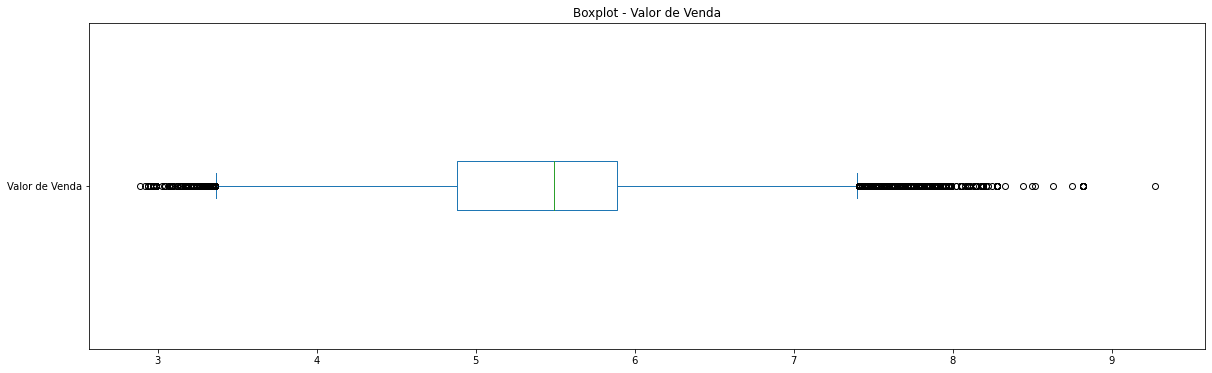

In [ ]:
#Gráfico Boxplot para identificar os outliers:
df['Valor de Venda'].plot.box(vert=False, figsize = (20,6));
plt.title('Boxplot - Valor de Venda');

Com o gráfico fica visível a presença de outliers, **considerando valores abaixo de aproximadamente 3.4 e acima de aproximandamente 7.3**

Temos agora que verificar se eles interferem diretamente nas grandezas estatística **a ponto de haver a necessidade de retirá-los da amostra de dados a ser analisada.**

In [ ]:
# Verificando algumas informações estatíticas da coluna 'Valor de Venda', 
#única coluna numérica presente nos dados para valores menores que 3.14 e maiores que 7.3
df[(df['Valor de Venda'] >= 3.4) & (df['Valor de Venda'] <= 7.3)].describe()

,Valor de Venda
count,124756.000000
mean,5.349248
std,0.814622
min,3.400000
25%,4.880000
50%,5.490000
75%,5.890000
max,7.300000


In [ ]:
df[(df['Valor de Venda'] >= 3.4) & (df['Valor de Venda'] <= 7.3)].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Valor de Venda    5.49
dtype: float64

Verificando as informações estatística considerando esse recorte percebemos que **não há grandes mudanças em relação aos valores de tendência centrais como média, mediana e desvio padrão.**

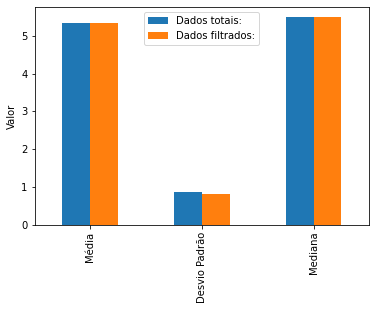

In [ ]:
#Gráfico das médias, desvio padrão e mediana dos dados completos e filtrados:

# Criando dicionário para nomeação dos index:
leg_dados = {0: 'Dados totais:', 1: 'Dados filtrados:'}

# Criando dataframe com os dados:
dados = pd.DataFrame({'Média': [5.35, 5.34], 'Desvio Padrão': [0.86, 0.81], 'Mediana': [5.49, 5.49]})

# Renomeando os index conforme dicionário criado:
dados.rename(index = leg_dados, inplace=True )

#Transpondo os dados e plotando:
dados.T.plot.bar()
plt.ylabel('Valor');

Dessa forma, como não há diferença considerável nos valores de tendência central com os dados total (contendo outliers) e os dados filtrados (sem os outliers), **decidimos seguir com nossas análises com a base de dados completa.**

### **3. Analisando os dados e respondendo as perguntas:**

Nesta etapa realizando uma análise descritiva dos dados através de algumas pergundas direcionadoras.

#### 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma de queda ou diminuição?

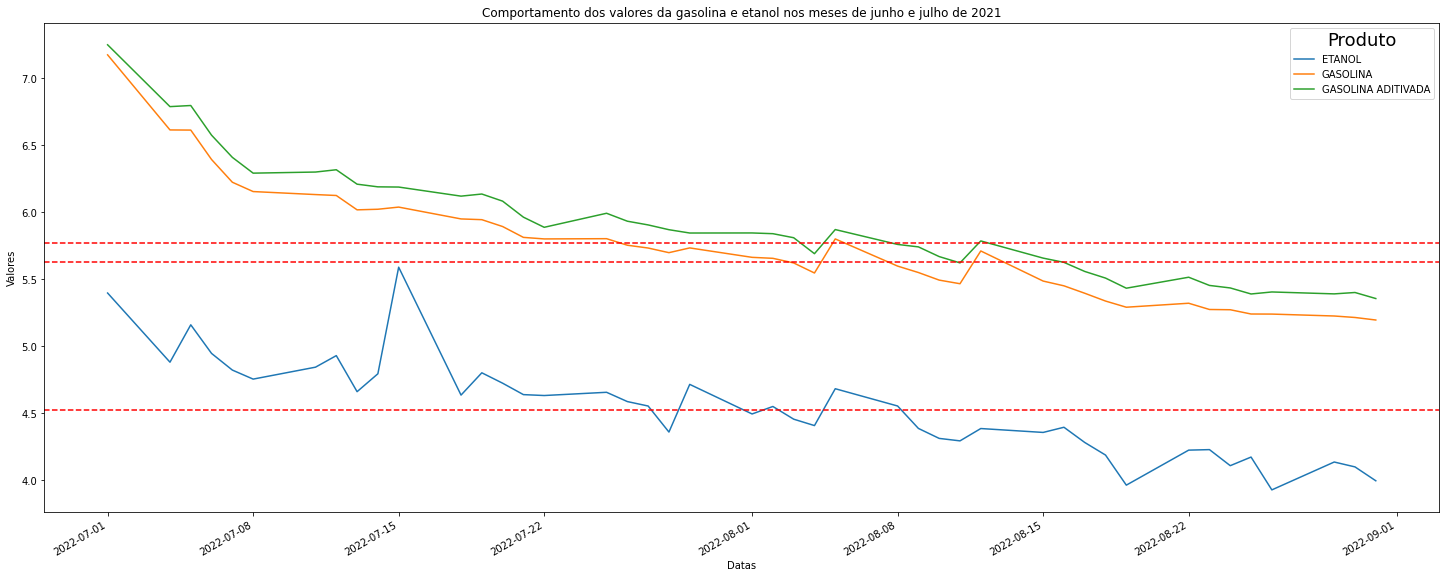

In [ ]:
# Criando uma cópia do df para tratamento dos dados em paralelo:
df_copia = df.copy()
df_copia['Data da Coleta'] = pd.to_datetime(df_copia['Data da Coleta'], format="%d/%m/%Y")

# Filtrando as informações conforme coluna 'Produto' (Etanol, Gasolina e Gasolina Aditivada):
etanol = df_copia.query('Produto == "ETANOL"')
gasolina = df_copia.query('Produto == "GASOLINA"')
gasolina_aditiv = df_copia.query('Produto == "GASOLINA ADITIVADA"')


# Agrupando e organização as informações pela coluna 'Data de Coleta' e verificando a média do valor de venda conforme coluna 'Valor de Venda':
evolucao_precos_etanol = etanol.sort_values(['Data da Coleta']).groupby('Data da Coleta')['Valor de Venda'].mean()
evolucao_precos_gasolina = gasolina.sort_values(['Data da Coleta']).groupby('Data da Coleta')['Valor de Venda'].mean()
evolucao_precos_gasolina_aditiv = gasolina_aditiv.sort_values(['Data da Coleta']).groupby('Data da Coleta')['Valor de Venda'].mean()

# Criando gráfico com as informações encontradas:

# Plotando os gráficos:
fig, ax = plt.subplots(figsize=(25, 10))
fig.autofmt_xdate()

#Título do gráfico e dos eixos:
plt.title("Comportamento dos valores da gasolina e etanol nos meses de junho e julho de 2021")
plt.xlabel("Datas")
plt.ylabel("Valores")

# Plotando os gráficos:
plt.plot(evolucao_precos_etanol)
plt.plot(evolucao_precos_gasolina)
plt.plot(evolucao_precos_gasolina_aditiv)

# Editando informações necessárias no gráfico:
plt.axhline(y = 4.52, color = 'r', linestyle = 'dashed')
plt.axhline(y = 5.77, color = 'r', linestyle = 'dashed')
plt.axhline(y = 5.63, color = 'r', linestyle = 'dashed')

# Legenda do gráfico:
legend = plt.legend(['ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA'], title = 'Produto', title_fontsize = 18)

A partir da análise feita verificamos que **ocorreu uma queda do compartamento dos preços médios dos combustíveis durante os meses de Julho e Agosto**, tendo a base de valor médio das Gasolinas entre 5,50 e 6,00 reais e do Etanol de 4,50 reais.



#### 2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [ ]:
# Agrupando e organização as informações pela coluna 'Produto':
agrupado = df.groupby('Produto')

# Verificando a média do valor de venda conforme coluna 'Valor de Venda':
media = agrupado[['Valor de Venda']].mean()

# Nomeando a coluna para 'Média dos Combustíveis':
media.columns = ['Média dos Combustíveis']

# Arredondado as informações para 2 casas deciamais:
media.round(2)

,Média dos Combustíveis
Produto,
ETANOL,4.51
GASOLINA,5.71
GASOLINA ADITIVADA,5.89


A partir da análise feita analisamos a **média** dos combustíveis entre os meses de Julho e Agosto.

####  3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [ ]:
# Filtrando as informações conforme coluna 'Produto' (Etanol, Gasolina e Gasolina Aditiviada), 
# agrupando pela coluna 'Estado - Sigla' e
# verificando a média do valor de venda conforme coluna 'Valor de Venda':

df[df.Produto.isin(["GASOLINA", "ETANOL","GASOLINA ADITIVADA"])].groupby(by='Estado - Sigla').agg({'Valor de Venda': 'mean'})\
.sort_values('Valor de Venda', ascending=False).head(5)

,Valor de Venda
Estado - Sigla,
RR,6.020909
PA,5.998639
AC,5.996797
CE,5.867937
RN,5.852482


A partir da análise feita dos principais estados com preço médio de gasolina e etanol mais caro, **pode-se perceber que os valores variam bem pouco entre 6.02 e 5.85 reais.**

Além de que os estados que tem o preço médio dos aditivos mais caro estão localizados entre as regiões Norte e Nordeste do Brasil.

####  4. Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
# Filtrando as informações conforme coluna 'Produto' (Etanol, Gasolina e Gasolina Aditiviada), 
# agrupando pela coluna 'Estado - Sigla' e pela coluna de 'Produto',
# verificando a média do valor de venda conforme coluna 'Valor de Venda', por fim
# ordenando por 1º Estado, 2º Produto, 3º Valor de Venda de forma decrescente.

df[df.Produto.isin(["GASOLINA", "ETANOL","GASOLINA ADITIVADA"])]\
.groupby(['Estado - Sigla','Produto'])[['Valor de Venda']]\
.mean().sort_values(['Estado - Sigla','Produto','Valor de Venda'], ascending=False)

Valor de Venda
Estado - Sigla Produto                           
TO             GASOLINA ADITIVADA        6.176667
               GASOLINA                  6.046250
               ETANOL                    5.151095
SP             GASOLINA ADITIVADA        5.773200
               GASOLINA                  5.527844
...                                           ...
AL             GASOLINA                  5.944651
               ETANOL                    5.240854
AC             GASOLINA ADITIVADA        6.177801
               GASOLINA                  6.211454
               ETANOL                    5.376684

[81 rows x 1 columns]

De acordo com a análise dos aditivos por estados, pode-se perceber a variação da gasolina, gasolina aditiva e etanol com o seu preço médio, **sendo que em alguns estados há variação da gasolina aditivada ser mais cara ou barata que a gasolina comum.**

O que ocorre em todos os estados é **o Etanol ser o aditivo mais barato de todos.**

#### 5. Qual o município que possui o menor preço para a gasolina e para o etanol?

In [ ]:
#Filtrando as informações conforme a diversidade de produtos (Etanol, Gasolina e Gasolina Aditivada):
gasolina = df.query('Produto =="GASOLINA"')
etanol = df.query('Produto =="ETANOL"')
aditivada = df.query('Produto =="GASOLINA ADITIVADA"')

In [ ]:
#Agrupando e organização as informações pelas colunas Estado - Sigla, Municipio e Produto e 
#verificando o menor preço conforme coluna Valor de Venda para todos os tipos de produtos:
gasolina.groupby(['Estado - Sigla','Municipio','Produto'])[['Valor de Venda']].min().sort_values(by='Valor de Venda').head(1)

,,,Valor de Venda
Estado - Sigla,Municipio,Produto,
RS,PASSO FUNDO,GASOLINA,4.13


In [ ]:
etanol.groupby(['Estado - Sigla','Municipio','Produto'])[['Valor de Venda']].min().sort_values(by='Valor de Venda').head(1)

,,,Valor de Venda
Estado - Sigla,Municipio,Produto,
SP,PRESIDENTE PRUDENTE,ETANOL,2.89


In [ ]:
aditivada.groupby(['Estado - Sigla','Municipio','Produto'])[['Valor de Venda']].min().sort_values(by='Valor de Venda').head(1)

,,,Valor de Venda
Estado - Sigla,Municipio,Produto,
RS,PASSO FUNDO,GASOLINA ADITIVADA,4.13


Podemos verificar que os munícipios com os **menores valores de venda para Gasolina, Etanol e Aditivada são Passo Fundo e Presidente Prudente.**

#### 6. Qual o município que possui o maior preço para a gasolina e para o etanol?

In [ ]:
#Reutilizando os mesmos dados gerados na pergunta anterior, determinamos os estado com os maiores valores de venda:
gasolina.groupby(['Estado - Sigla','Municipio','Produto'])[['Valor de Venda']].max().sort_values(by='Valor de Venda',ascending=False).head(1)

,,,Valor de Venda
Estado - Sigla,Municipio,Produto,
TO,GURUPI,GASOLINA,8.75


In [ ]:
etanol.groupby(['Estado - Sigla','Municipio','Produto'])[['Valor de Venda']].max().sort_values(by='Valor de Venda',ascending=False).head(1)

,,,Valor de Venda
Estado - Sigla,Municipio,Produto,
RS,BAGE,ETANOL,7.89


In [ ]:
aditivada.groupby(['Estado - Sigla','Municipio','Produto'])[['Valor de Venda']].max().sort_values(by='Valor de Venda',ascending=False).head(1)

,,,Valor de Venda
Estado - Sigla,Municipio,Produto,
RJ,MAGE,GASOLINA ADITIVADA,9.27


Nota-se que os municípios com **os maiores valores para Gasolina, Etanol e Aditivada são, respectivamente, Gurupi, Bagé e Magé.**


#### 7. Qual a região que possui o maior valor médio da gasolina?

In [ ]:
# Filtrando as informações conforme coluna 'Produto' (Etanol, Gasolina e Gasolina Aditivada):
# agrupando pela coluna 'Regiao - Sigla' e verificando a média do valor de venda pela coluna 'Valor de Venda":

dfGasolina = df[df['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')[['Valor de Venda']].mean()
dfGasolina.head()

,Valor de Venda
Regiao - Sigla,
CO,5.581603
N,5.972082
NE,5.955809
S,5.641161
SE,5.615655


Também podemos visualizar esses dados na forma de gráfico:

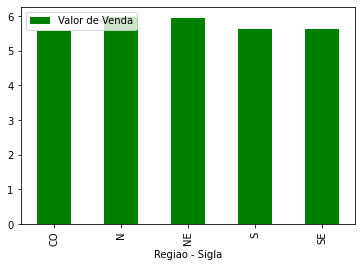

In [ ]:
dfGasolina.plot.bar(color="g")

In [ ]:
# Mostrando a sigla da região e o maior valor para produto 'Gasolina':
print(dfGasolina.idxmax())
print(dfGasolina.max())

Valor de Venda    N
dtype: object
Valor de Venda    5.972082
dtype: float64


A partir da análise do valor de venda médio da gasolina agrupado por região percebe-se que a região norte possui o maior valor de venda médio de gasolina, sendo aproximadamente R$5,97 por litro.

In [ ]:
# Filtrando as informações conforme coluna 'Produto' (Etanol, Gasolina e Gasolina Aditivada):
# agrupando pela coluna 'Regiao - Sigla' e verificando a média do valor de venda pela coluna 'Valor de Venda":

dfGasolinaAditivada = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Regiao - Sigla')[['Valor de Venda']].mean()
dfGasolinaAditivada.head()

,Valor de Venda
Regiao - Sigla,
CO,5.721266
N,6.105695
NE,6.109450
S,5.777628
SE,5.827207


Também podemos visualizar esses dados na forma de gráfico:

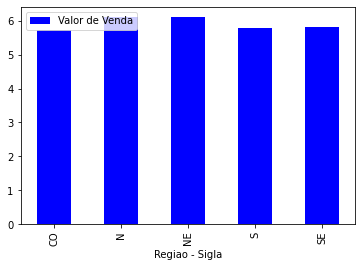

In [ ]:
dfGasolinaAditivada.plot.bar(color="b")

In [ ]:
# Mostrando a sigla da região e o maior valor para produto 'Gasolina Aditivada':
print(dfGasolinaAditivada.idxmax())
print(dfGasolinaAditivada.max())

Valor de Venda    NE
dtype: object
Valor de Venda    6.10945
dtype: float64


A partir da análise do valor de venda médio da gasolina aditivada agrupado por região percebe-se que a **região nordeste possui o maior valor de venda médio de gasolina, sendo aproximadamente 6,11 reais por litro.**

#### 8. Qual a região que possui o menor valor médio do etanol?

In [ ]:
# Filtrando as informações conforme coluna 'Produto' (Etanol, Gasolina e Gasolina Aditivada):
# agrupando pela coluna 'Regiao - Sigla' e verificando a média do valor de venda pela coluna 'Valor de Venda":

dfEtanol = df[df['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')[['Valor de Venda']].mean()
dfEtanol.head()

,Valor de Venda
Regiao - Sigla,
CO,4.107305
N,5.340633
NE,5.246069
S,4.842372
SE,4.149964


Também podemos visualizar esses dados na forma de gráfico:

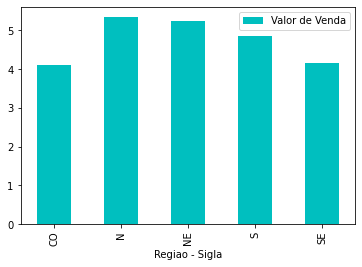

In [ ]:
dfEtanol.plot.bar(color="c")

In [ ]:
# Mostrando a sigla da região e o maior valor para produto 'Etanol':

print(dfEtanol.idxmin())
print(dfEtanol.min())

Valor de Venda    CO
dtype: object
Valor de Venda    4.107305
dtype: float64


A partir da análise do valor de venda médio do etanol agrupado por região percebe-se que a **região centro-oeste possui o menor valor de venda médio de etanol, sendo aproximandamente 4,11 reais por litro.**

#### 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

#### 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
# Mapeando regiões da coluna 'Regiao - Sigla':
df['Regiao - Sigla'].unique() 

array(['SE', 'CO', 'NE', 'S', 'N'], dtype=object)

In [ ]:
# Alterando os atributos qualitativos para quantitativos da coluna 'Regiao - Sigla':
df_1 = df.copy()
df_1['Regiao - Sigla'] = df_1['Regiao - Sigla'].replace(['SE', 'CO', 'NE', 'S', 'N'], [1,2,3,4,5]) 

In [ ]:
# Mapeando as bandeiras da coluna 'Bandeira':
df['Bandeira'].unique()

array(['VIBRA ENERGIA', 'IPIRANGA', 'BRANCA', 'RAIZEN', 'REJAILE',
       'RODOIL', "ATEM' S", 'ALESAT', 'SP', 'TOTALENERGIES', 'SABBÁ',
       'FEDERAL ENERGIA', 'DISLUB', 'TEMAPE', 'ESTRADA', 'IDAZA', 'STANG',
       'RAIZEN MIME', 'PETROX DISTRIBUIDORA', 'PETROBAHIA', 'TAURUS',
       'CIAPETRO', 'CHARRUA', 'EQUADOR', 'SETTA DISTRIBUIDORA',
       'MASUT DISTRIBUIDORA', 'RIO BRANCO', 'RZD DISTRIBUIDORA',
       'SUL COMBUSTÍVEIS', 'SIMARELLI', 'SMALL', 'TDC DISTRIBUIDORA',
       'PETROSERRA', 'ATLÂNTICA', 'FAN', 'MAXSUL', 'DIBRAPE',
       'WALENDOWSKY', 'WATT', 'POTENCIAL', 'ROYAL FIC', 'UNI',
       'MONTEPETRO', 'TORRAO', 'PELIKANO', 'AMERICANOIL', 'LARCO',
       'RUFF C.J.', 'PETRONAC'], dtype=object)

In [ ]:
# Alterando os atributos qualitativos para quantitativos da coluna 'Bandeira':
df_1['Bandeira'] = df_1['Bandeira'].replace(['VIBRA ENERGIA', 'IPIRANGA', 'BRANCA', 'RAIZEN', 'REJAILE', 'RODOIL', "ATEM' S", 'ALESAT', 'SP', 'TOTALENERGIES', 'SABBÁ', 'FEDERAL ENERGIA', 'DISLUB', 'TEMAPE', 'ESTRADA', 'IDAZA', 'STANG', 'RAIZEN MIME', 'PETROX DISTRIBUIDORA', 'PETROBAHIA', 'TAURUS', 'CIAPETRO', 'CHARRUA', 'EQUADOR', 'SETTA DISTRIBUIDORA', 'MASUT DISTRIBUIDORA', 'RIO BRANCO', 'RZD DISTRIBUIDORA', 'SUL COMBUSTÍVEIS', 'SIMARELLI', 'SMALL', 'TDC DISTRIBUIDORA', 'PETROSERRA', 'ATLÂNTICA', 'FAN', 'MAXSUL', 'DIBRAPE', 'WALENDOWSKY', 'WATT', 'POTENCIAL', 'ROYAL FIC', 'UNI', 'MONTEPETRO', 'TORRAO', 'PELIKANO', 'AMERICANOIL', 'LARCO', 'RUFF C.J.', 'PETRONAC'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]) 

In [ ]:
# Mapeando os tipos de produto da coluna "Produto":
df['Produto'].unique()

array(['GASOLINA ADITIVADA', 'GASOLINA', 'ETANOL'], dtype=object)

Correlação da Bandeira, Valor de Venda e Região para Gasolina Aditivada:

---

In [ ]:
# Filtrando com um dos tipos de produto: "GASOLINA ADITIVADA"
df_gasolina_aditivada = df_1.query('Produto == "GASOLINA ADITIVADA"')

In [ ]:
# Verificando correlação entre Bandeira ("GASOLINA ADITIVADA") e Valor de Venda:
correlacao = df_gasolina_aditivada.corr().round(2)
correlacao

,Regiao - Sigla,Valor de Venda,Bandeira
Regiao - Sigla,1.00,0.10,0.17
Valor de Venda,0.10,1.00,-0.01
Bandeira,0.17,-0.01,1.00


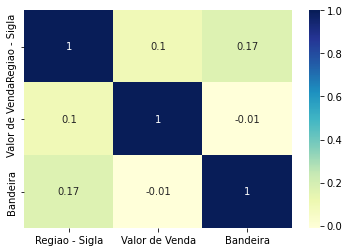

In [ ]:
# Criando gráfico de correlação entre Bandeira ("GASOLINA ADITIVADA") Valor de Venda e Região:
sns.heatmap(correlacao, xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True, cmap="YlGnBu")

Analisando o gráfico de correlação acima, vemos que a correlação entre a coluna  ``Valor de venda`` e a coluna ``Regiao - Sigla `` para o produto "Gasolina Aditivada" é de **0.1**, ou seja, não há uma correlação direta entre as duas variáveis.

Ainda sobre o produto "Gasolina Aditiviada, verificamos que entre as colunas ``Valor de venda`` e ``Bandeira`` há uma correlação inversa de **-0,01**, ou seja, não há uma correlação direta entre as duas variáveis.

Correlação da Bandeira, Valor de Venda e Região para Gasolina:

---

In [ ]:
# Filtrando com um dos tipos de produto: "GASOLINA"]
df_gasolina = df_1.query('Produto == "GASOLINA"')

In [ ]:
# Verificando correlação entre Bandeira ("GASOLINA") e Valor de Venda:
correlacao_2 = df_gasolina.corr().round(2)
correlacao_2 

,Regiao - Sigla,Valor de Venda,Bandeira
Regiao - Sigla,1.00,0.17,0.15
Valor de Venda,0.17,1.00,0.03
Bandeira,0.15,0.03,1.00


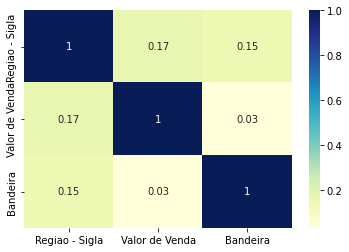

In [ ]:
# Criando gráfico de correlação entre Bandeira ("GASOLINA") e Valor de Venda e Região:
sns.heatmap(correlacao_2, xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True, cmap="YlGnBu")

Analisando o gráfico de correlação acima, vemos que a correlação entre a coluna  ``Valor de venda`` e a coluna ``Regiao - Sigla `` para o produto "Gasolina" é de **0.17**, ou seja, não há uma correlação direta entre as duas variáveis.

Ainda sobre o produto "Gasolina Aditiviada, verificamos que entre as colunas ``Valor de venda`` e ``Bandeira`` há uma correlação de **0,03**, ou seja, não há uma correlação direta entre as duas variáveis.

Correlação da Bandeira, Valor de Venda e Região para Etanol:

---

In [ ]:
# Filtrando com um dos tipos de produto: "ETANOL"
df_etanol = df_1.query('Produto == "ETANOL"')

In [ ]:
# Verificando correlação entre Bandeira ("ETANOL") e Valor de Venda:
correlacao_3 = df_etanol.corr().round(2)
correlacao_3 

,Regiao - Sigla,Valor de Venda,Bandeira
Regiao - Sigla,1.00,0.57,0.14
Valor de Venda,0.57,1.00,0.07
Bandeira,0.14,0.07,1.00


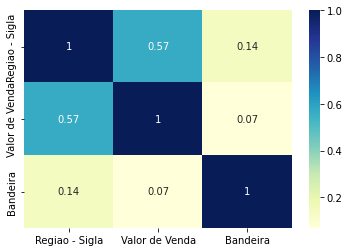

In [ ]:
# Criando gráfico de correlação entre Bandeira ("ETANOL") e Valor de Venda:
sns.heatmap(correlacao_3, xticklabels=correlacao.columns, yticklabels=correlacao.columns, annot=True, cmap="YlGnBu")

Analisando o gráfico de correlação acima, vemos que a correlação entre a coluna  ``Valor de venda`` e a coluna ``Regiao - Sigla `` para o produto "Etanol" é de **0.50**, ou seja, há uma correlação diretamente proporcional moderada entre essas duas variáveis, sendo uma correlação maior que a verificada nos produtos "Gasolina Aditivada" e "Gasolina".

Ainda sobre o produto "Etanol", verificamos que entre as colunas ``Valor de venda`` e ``Bandeira`` há uma correlação de **0,07**, ou seja, não há uma correlação direta entre as duas variáveis.

#### 11.  Qual é maior a média de preço de venda por Bandeira?



In [ ]:
#Agrupamos pela coluna "Bandeira" e calculamos e média dos valores de venda pela coluna "Valor de Venda":

df.groupby('Bandeira')[['Valor de Venda']].mean().sort_values(by=['Valor de Venda'], ascending=False).round(2).head(5)

,Valor de Venda
Bandeira,
PETRONAC,6.19
EQUADOR,5.94
SP,5.93
REJAILE,5.91
FAN,5.89


Verificamos que a **bandeira com o maior valor médio presente nos dados é a PETRONAC.**

#### 12. Qual revenda vendeu mais caro em média, por região:

In [ ]:
# Filtramos pelas regiões na coluna "'Regiao - Sigla'", 
#agrupamos pelas colunas 'Regiao - Sigla' e'Revenda' e calculamos 
#e média dos valores de venda pela coluna "Valor de Venda" para cada :

#Região SE - Sudeste

df[df['Regiao - Sigla'].isin(["SE"])]\
.groupby(['Regiao - Sigla','Revenda'])[['Valor de Venda']]\
.mean().sort_values(by=['Valor de Venda'], ascending=False).round(2).head(5)

Valor de Venda
Regiao - Sigla Revenda                                            
SE             3POSTO RONCADOR LTDA.                          7.24
               POSTO DE SERVICO NINO S LTDA                   6.76
               POSTO SUPERSONICO LTDA                         6.72
               POSTO CARIOQUINHA LTDA                         6.69
               CENTRO AUTOMOTIVO ALPHA CENTER LTDA            6.69

In [ ]:
#Região CO - Centro-Oeste

df[df['Regiao - Sigla'].isin(["CO"])]\
.groupby(['Regiao - Sigla','Revenda'])[['Valor de Venda']]\
.mean().sort_values(by=['Valor de Venda'], ascending=False).round(2).head(5)

Valor de Venda
Regiao - Sigla Revenda                                  
CO             POSTO PAULISTA PNEUS LTDA            6.27
               MARINHO & CIA LTDA                   6.17
               WMR MINEIROS LTDA                    6.16
               AUTO POSTO SUPER SOL LTDA            5.95
               ARAUJO & DUENHA LTDA                 5.93

In [ ]:
#Região S - Sul

df[df['Regiao - Sigla'].isin(["S"])]\
.groupby(['Regiao - Sigla','Revenda'])[['Valor de Venda']]\
.mean().sort_values(by=['Valor de Venda'], ascending=False).round(2).head(5)

Valor de Venda
Regiao - Sigla Revenda                                                           
S              OP DERIVADOS DE PETROLEO LTDA                                 7.04
               BARROS, DIAS & CIA LTDA                                       6.96
               SLD COMERCIO DE COMBUSTIVEIS LTDA                             6.90
               COMERCIAL INTERNACIONAL LTDA                                  6.77
               SANTA MARIA DISTRIBUIDORA DE DERIVADOS DE PETRO...            6.68

In [ ]:
#Região N - Norte

df[df['Regiao - Sigla'].isin(["N"])]\
.groupby(['Regiao - Sigla','Revenda'])[['Valor de Venda']]\
.mean().sort_values(by=['Valor de Venda'], ascending=False).round(2).head(5)

Valor de Venda
Regiao - Sigla Revenda                                          
N              M C D CARVALHO & CIA LTDA                    7.50
               A. M. DE FARIAS - EPP                        7.50
               BRITO E BARRA LTDA                           7.29
               M T COMERCIO DE COMBUSTIVEIS LTDA            7.26
               M DOS S TELLO SOBRINHO                       7.26

In [ ]:
#Região NE - Nordeste

df[df['Regiao - Sigla'].isin(["NE"])]\
.groupby(['Regiao - Sigla','Revenda'])[['Valor de Venda']]\
.mean().sort_values(by=['Valor de Venda'], ascending=False).round(2).head(5)

Valor de Venda
Regiao - Sigla Revenda                                                    
NE             AUTOPOSTO CONFIANCA LTDA                               7.43
               J.C COMERCIO VAREJISTA DE COMBUSTIVEIS LTDA            7.27
               COMERCIAL DE PETROLEO MOREIRA PEQUENO LTDA             7.14
               ALIANCA COMERCIO DE COMBUSTIVEIS LTDA                  7.09
               COMERCIO DE COMBUSTIVEIS PETROSOJA II LTDA             7.09

### **4. Conclusão:**

>No Brasil, o preço pago pelo consumidor final nos combustíveis derivados de petróleo é composto por diversos tipos de impostos, custos de transporte, taxas e etc. Como podemos verificar, a progressão dos valores é notável, afetando diretamente a vida de milhares de Brasileiros.

Segue abaixo algumas informações importantes das análises realizadas:

- A tratativa de outliers não foi necessária nos dados analisados.

- Ao longo do período analisado o preço médio dos aditivos diminuiu, com o Etanol tendo a maior variação.

- O valor médio do Etanol está diretamente ligado a região de revenda (correlação de 0.5) enquanto a Gasolina e a Gasolina Aditivada não possuem correlação com essa variável. 

- Em geral, os aditivos são em média mais caros nas regiões Norte e Nordeste.

>Como um todo, o projeto acima foi resultado de um esforço mútuo da nossa equipe, utilizando de forma coesa o tempo definido, conseguimos estipular análises e retirar informações precisas sobre o valor dos combustíveis listados. 

### **5. Referências:**

Portal Brasileiro de Dados Abertos: Série Histórica de Preços de Combustíveis (Agência Nacional do Petróleo, Gás Natural e Biocombustíveis - ANP): https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda. Acesso em 22/09/2022.